# CM3015 Machine Learning and Neural Networks Mid-term Coursework 

# 1. Abstract

<b>The aim of this project is to determine the optimal classification model among K-Nearest Neighbors (kNN), Decision Tree, and Naive Bayes for scikit-learn Wine dataset.</b> The study involves assessing the performance of each algorithm using metrics such as confusion matrices and cross-validation with F1 scores. Additionally, this project aims to compare the algorithms across diverse datasets, examining variations within a particular algorithm (i.e. PCA initialization), and comparing different algorithms on the same dataset. By focusing on classification models and leveraging comprehensive evaluation techniques, the project seeks to provide insights into the strengths and weaknesses of these algorithms, aiding in informed decision-making for classification tasks.

# 2. Introduction

The dataset at the heart of this project is the renowned Wine dataset, readily available in scikit-learn. This dataset encapsulates a rich array of attributes related to the chemical composition of wines, with each instance belonging to one of three classes representing different wine cultivars. While the Wine dataset serves as an invaluable resource for exploring classification algorithms, it is not without its challenges. Notably, one may encounter issues such as class imbalance, potential outliers, or the need for feature scaling. Moreover, prior investigations into this dataset have primarily focused on its application in classification tasks, with a notable emphasis on discerning the characteristics that differentiate the wine classes. By navigating these challenges and building upon existing research, this project aims to provide a nuanced understanding of the dataset's intricacies and contribute novel insights into the performance of classification algorithms in the context of wine cultivar prediction.

# 3. Background

In this project, 3 fundamental classification algorithms — <b> K-Nearest Neighbors (kNN), Decision Tree, and Naive Bayes </b>— have been employed to predict the wine cultivar classes within the scikit-learn Wine dataset.

<ol><li> <b>K-Nearest Neighbors (kNN):</b> kNN is an intuitive algorithm based on the principle of similarity. It classifies an unknown instance by examining the majority class among its k-nearest neighbors in the feature space. kNN calculates distances between data points using either Euclidean principle or Manhattan principle. Given that the wine dataset is relatively small, it will reduce the computational burden for kNN as it compares the query point to fewer neighbors. A smaller dataset is also beneficial for kNN as each data point has a greater impact on the decision boundaries, potentially leading to more accurate predictions since kNN tends to be sensitive to noisy data. <i>[1]</i><br\><br\> To find the optimal model for kNN, the hyper-parameter(i.e. k) has to be found so that the cross validation accuracy (i.e. F1 score) will be the highest. The hyper-parameter, k, cannot be too small as the model will be overfitting. While on the other hand, if k is large then model is underfitting. Hyper-parameter, k, has to be highest average cross validation score which will make it the right model, which is neither underfitting nor overfitting.</li><br\><li> <b>Decision Tree:</b> Decision trees are hierarchical structures that recursively split the dataset based on the most informative features. These splits form a tree-like structure, enabling the algorithm to make decisions by traversing the branches. The reason of choosing Decision Tree as the 2<sup>nd</sup> machine learning algorithm is because, the wine dataset is small. With a smaller dataset, Decision Tree algorithm trains computationally faster as it has to evaluate fewer data points and features during the training process. <br\><br\> To find the optimal model for Decision Tree, the hyper-paramters(i.e. max_depth and min_sample_split) cannot be too small or too large. In a case where the max_depth is too small, model will underfit and max_depth being too larger will lead to overfitting. While a small min_sample_split make model overfit and a large min_sample_split will lead to underfitting of model.</li><br\><li> <b>Naive Bayes:</b> Naive Bayes is a probabilistic algorithm grounded in Bayes' theorem. It assumes independence between features, leading to a simplified model. Despite its naive assumptions, Naive Bayes often performs well and is particularly suitable for high-dimensional datasets. The reason for the choice of Naive Bayes is because it does not need a hyper-parameter to achieve an optimal model. It is also highly scalable with the number of predictors and data points and does not require much training data. <i>[2]</i></li></ol>


Understanding the inner workings of these algorithms involves grasping their distinctive approaches to classification. kNN relies on distance metrics to find the nearest neighbors, Decision Trees make decisions through a series of feature-based splits, and Naive Bayes calculates probabilities based on the assumed independence of features. Throughout the project, these algorithms are applied, fine-tuned, and rigorously evaluated to discern their performance nuances in predicting wine cultivar classes.

# 4. Methodology

<h2> 4.1 Importing necessary packages and libraries</h2>

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install PrettyTable

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [4]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.metrics as metrics

from sklearn import datasets, naive_bayes
from collections import Counter
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from prettytable import PrettyTable
from sklearn.decomposition import PCA


%matplotlib inline

<h2> 4.2 Loading Dataset </h2>

In [5]:
# load data
wine=datasets.load_wine()
#print(wine.DESCR)

<h2> 4.3 Exploratory Data Analysis </h2>

In [6]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df["target"] = wine["target"]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.shape

(178, 14)

In [8]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [9]:
#renaming columns for easier references when training and testing of models.
df.rename(columns={"alcohol":"X1",
                  "malic_acid":"X2",
                   "ash":"X3",
                   "alcalinity_of_ash":"X4",
                   "magnesium":"X5",
                   "total_phenols":"X6",
                   "flavanoids":"X7",
                   "nonflavanoid_phenols":"X8",
                   "proanthocyanins":"X9",
                   "color_intensity":"X10",
                   "hue":"X11",
                   "od280/od315_of_diluted_wines":"X12",
                   "proline":"X13"
                  },inplace = True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [11]:
#defining the X and y variables
X = df.astype(float)
y = X.pop("target")

In [12]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [13]:
X.shape

(178, 13)

In [14]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [15]:
y.unique()

array([0., 1., 2.])

<h3> 4.3.1 Balanced or Imbalanced Dataset </h3>

In [16]:
Counter(y)

Counter({0.0: 59, 1.0: 71, 2.0: 48})

Since there are imbalanced dataset, accuracy cannot be used as a factor to measure which algorithm is the best algorithm. Therefore, we have to use F1 score to evaluate the best algorithm for wine dataset.

In [17]:
baseline = 71 / (59+71+48)
baseline

0.398876404494382

Machine Learning models will have to be better than 40% accuracy.

<h3> 4.3.2 Box Plot </h3>

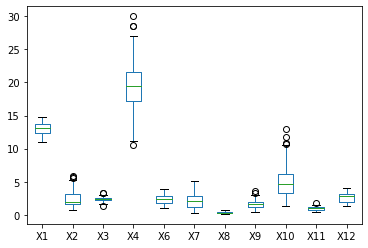

In [18]:
boxplot1 = df[["X1","X2","X3","X4","X6","X7","X8","X9","X10","X11","X12"]].boxplot()
plt.grid()

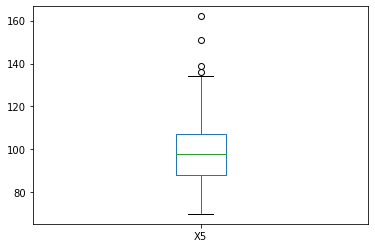

In [19]:
boxplot2 = df[["X5"]].boxplot()
plt.grid()

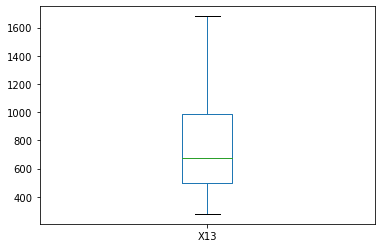

In [20]:
boxplot3 = df[["X13"]].boxplot()
plt.grid()

With reference to the above box plots, it can be observed that there are outliers for X2, X3, X4, X5, X9, X10, X11. The data points are also spread very far apart. 

For X2, X10 and X13, the median is slightly towards the 25% cut off of the data points, whilst X1, X3, X6, X9, X11 and X12 have the median towards the 75% cut off of the data points.

<h3> 4.3.3 Train-Test-Split </h3>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=178)

In [22]:
X_train.shape

(142, 13)

In [23]:
X_test.shape

(36, 13)

<h3> 4.3.4 Feature Scaling</h3>

Scaling comes in handy since data points are widely spread. Hence, scaling is a technique to make the data points closer to one another, which also means that the distance between each data points will be lower. <i>[3]</i>

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

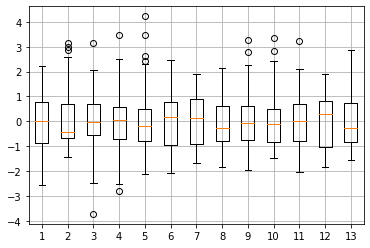

In [25]:
scalePlotTrain = plt.boxplot(Xs_train)
plt.grid()

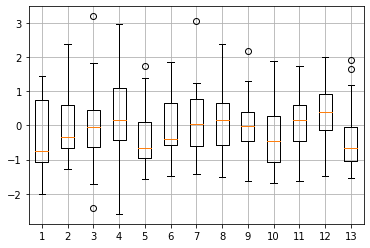

In [26]:
scalePlotTest = plt.boxplot(Xs_test)
plt.grid()

After scaling of X, we can see that the data points are now closer to each other. The median of all features (X1 to X13) are generally close to 0, which means that data points are well spread across it's range.

<h3> 4.3.5 Principal component analysis (PCA) of Wine Dataset </h3>

In [27]:
pca =PCA()
pca.fit(Xs_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.explained_variance_

array([4.95443598, 2.48095464, 1.23371225, 0.95829811, 0.92483735,
       0.62518353, 0.59596295, 0.33595261, 0.27550747, 0.24703412,
       0.22226888, 0.16093055, 0.07712014])

Based on Kaiser Rule, the criterion to drop the componenets for which the eigenvalues are less than 1 (when the data are standardized). Those values that greater than 1 eigenvalue suggests that its corresponding component explains more variance than a single variable, given that a variable accounts for a unit of variance. <i>[4]</i> Therefore, I will keep the first 4 principal components as the features.

In [29]:
pca = PCA(n_components=4)
pca.fit(Xs_train)
Xp_train = pca.transform(Xs_train)
Xp_test = pca.transform(Xs_test)

In [30]:
Xp_train.shape, Xp_test.shape

((142, 4), (36, 4))

<p><b>Training set for PCA:</b> Xp_train, y_train 
<br\>
    <b>Testing set for PCA:</b> Xp_test, y_test</p>

# 5. Machine Learning Models

<h2> 5.1 K-Nearest Neighbors (kNN) from scratch </h2>

In [31]:
def calculate_euclidean_distance(x1, x2):
    x1 = np.array(x1).astype(float)
    x2 = np.array(x2).astype(float)
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [32]:
def k_nearest_neighbors(query, k, training_data, training_labels):
    distances = np.array([calculate_euclidean_distance(query, x) for x in training_data])
    indices = np.argsort(distances)[:k]

    classes = np.unique(training_labels)
    counts = np.zeros(len(classes))

    for i, c in enumerate(classes):
        counts[i] = np.sum(np.array(c) == np.array(training_labels)[indices])

    most_frequent_class = classes[np.argmax(counts)]
    return most_frequent_class

<h3> 5.1.1 Find the best k to optimize kNN model </h3>

In [33]:
results = []
for k_value in range(1, 11):
    predictions = []
    accuracy_count = 0

    for i in range(len(Xs_test)):
        predictions.append(k_nearest_neighbors(Xs_test[i], k_value, Xs_train, y_train))
        if predictions[i] == y_test.values[i]:
            accuracy_count += 1

    results.append([k_value, accuracy_count / len(Xs_test)])

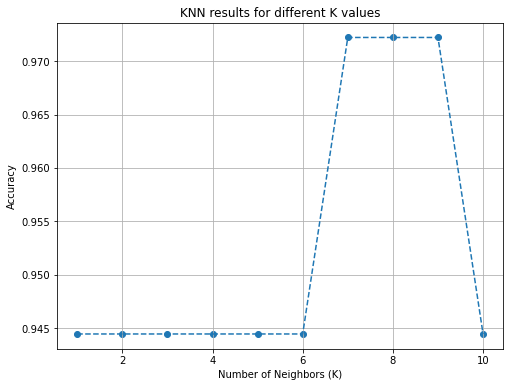

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(np.asarray(results)[:, 0], np.asarray(results)[:, 1])
plt.plot(np.asarray(results)[:, 0], np.asarray(results)[:, 1], '--')
plt.title('KNN results for different K values')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.grid(True)
plt.show()

From the plot above, it shows that when k=7, 8 and 9, the accuracy is the highest. Therefore, I choose to take the average between the 3 values, where best parameters for kNN will be k=8.

<h3> 5.1.2 Results (kNN) </h3>

In [35]:
k_dist =8

# Train model with k_dist
predicted_labels = [k_nearest_neighbors(x, k_dist, Xs_train, y_train) for x in Xs_test]

# Calculate precision, recall, and f1 score
precisionkNN = precision_score(y_test, predicted_labels, average='macro') 
recallkNN = recall_score(y_test, predicted_labels, average='macro') 
f1kNN = f1_score(y_test, predicted_labels, average='macro')  

# Print precision, recall, and f1 score
print("Precision:", precisionkNN)
print("Recall:", recallkNN)
print("F1 Score:", f1kNN)

# Print confusion matrix
conf_matrixkNN = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrixkNN)

Precision: 0.9629629629629629
Recall: 0.9841269841269842
F1 Score: 0.9722620755619321
Confusion Matrix:
[[ 8  0  0]
 [ 1 20  0]
 [ 0  0  7]]


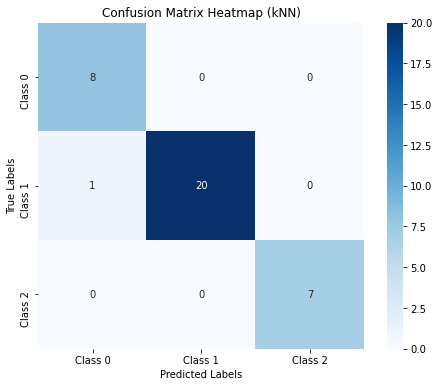

In [36]:
# Convert the confusion matrix to a DataFrame for easier plotting
class_labels = ['Class 0', 'Class 1', 'Class 2']
conf_matrix_df = pd.DataFrame(conf_matrixkNN, index=class_labels, columns=class_labels)

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g', cbar=True, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (kNN)')
plt.show()

<h3> 5.1.3 Results (kNN) PCA

In [37]:
k_dist =8

# Train model with k_dist
predicted_labels = [k_nearest_neighbors(x, k_dist, Xp_train, y_train) for x in Xp_test]

# Calculate precision, recall, and f1 score
precisionkNNPCA = precision_score(y_test, predicted_labels, average='macro')  
recallkNNPCA = recall_score(y_test, predicted_labels, average='macro') 
f1kNNPCA = f1_score(y_test, predicted_labels, average='macro')

# Print precision, recall, and f1 score
print("Precision:", precisionkNNPCA)
print("Recall:", recallkNNPCA)
print("F1 Score:", f1kNNPCA)

# Print confusion matrix
conf_matrixkNNPCA = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrixkNNPCA)

Precision: 0.9333333333333332
Recall: 0.9682539682539683
F1 Score: 0.9462962962962963
Confusion Matrix:
[[ 8  0  0]
 [ 2 19  0]
 [ 0  0  7]]


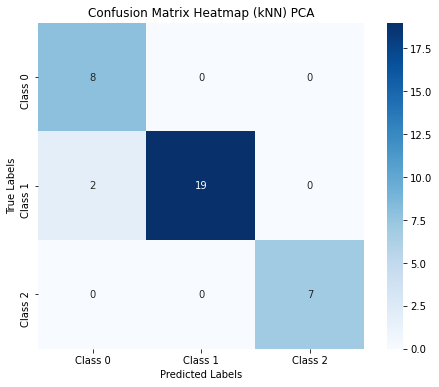

In [38]:
# Convert the confusion matrix to a DataFrame for easier plotting
class_labels = ['Class 0', 'Class 1', 'Class 2']
conf_matrix_dfPCA = pd.DataFrame(conf_matrixkNNPCA, index=class_labels, columns=class_labels)

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dfPCA, annot=True, cmap='Blues', fmt='g', cbar=True, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (kNN) PCA')
plt.show()

<h2> 5.2 Decision Tree </h2>

In [39]:
def decisionTree(Xtrain, Xtest, ytrain, ytest, maxDepth, minSamplesSplit):
    # Create a new DecisionTreeClassifier with the specified hyperparameters
    best_dt = DecisionTreeClassifier(max_depth=maxDepth, min_samples_split=minSamplesSplit)

    # Train model on the training data
    best_dt.fit(Xtrain, ytrain)

    # Predict values for the test data based on the best model
    y_pred_best = best_dt.predict(Xtest)

    # Calculate precision, recall, confusion matrix, and F1 Score of Decision Tree
    precision_dt = precision_score(ytest, y_pred_best, average='macro')
    recall_dt = recall_score(ytest, y_pred_best, average='macro')
    f1score_dt = f1_score(ytest, y_pred_best, average='macro')
    conf_matrix_dt = confusion_matrix(ytest, y_pred_best)

    # Return the metrics
    return conf_matrix_dt, precision_dt, recall_dt, f1score_dt

<h3> 5.2.1 Find the best max_depth and min_samples_split to optimize Decision Tree Model </h3>

In [40]:
# Define the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=0)

# Define the parameter grid to search
param_grid = {
    'max_depth': range(1, 10),         
    'min_samples_split': range(2, 10)   
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1_macro')

# Fit the grid search to the data
grid_search.fit(Xs_train, y_train)

# Best Parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters: ", best_params)

# Get the best classifier
best_dt = grid_search.best_estimator_

# Predict values for test data based on the best model
y_pred_best = best_dt.predict(Xs_test)

# Print values
#print("True Values: ", y_test)
#print("Predicted Values: ", y_pred_best)

# Print confusion matrix and F1 score for the best model
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_best))
print("F1 Score: ", f1_score(y_test, y_pred_best, average='macro'))

Best Parameters:  {'max_depth': 3, 'min_samples_split': 2}
Confusion Matrix: 
 [[ 8  0  0]
 [ 0 20  1]
 [ 0  0  7]]
F1 Score:  0.9696476964769648


The best max_depth is 3 and min_samples_split is 2. I will train the model with max_depth = 3 and min_samples_split = 2.

<h3> 5.2.2 Results (Decision Tree) </h3>

Precision: 
 0.9583333333333334
Recall:  0.9841269841269842
Confusion Matrix: 
 [[ 8  0  0]
 [ 0 20  1]
 [ 0  0  7]]
F1 Score:  0.9696476964769648


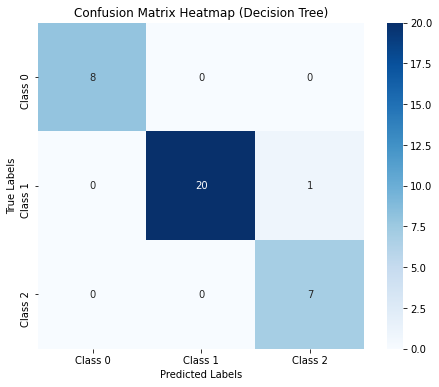

In [41]:
# Call the function with training and testing data
conf_matrix_dt, precision_dt, recall_dt, f1score_dt = decisionTree(Xs_train, Xs_test, y_train, y_test, 3, 2)

# Convert the confusion matrix to a DataFrame for easier plotting
class_labels = ['Class 0', 'Class 1', 'Class 2'] 
conf_matrix_df = pd.DataFrame(conf_matrix_dt, index=class_labels, columns=class_labels)

# Print precision, recall, confusion matrix and F1 score for the best model
print("Precision: \n", precision_dt)
print("Recall: ", recall_dt)
print("Confusion Matrix: \n", conf_matrix_dt)
print("F1 Score: ", f1score_dt)

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g', cbar=True, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Decision Tree)')
plt.show()

<h3> 5.2.3 Results (Decision Tree) PCA </h3>

Precision: 
 0.9280303030303031
Recall:  0.8948412698412698
Confusion Matrix: 
 [[ 7  1  0]
 [ 1 20  0]
 [ 0  1  6]]
F1 Score:  0.9094364937388192


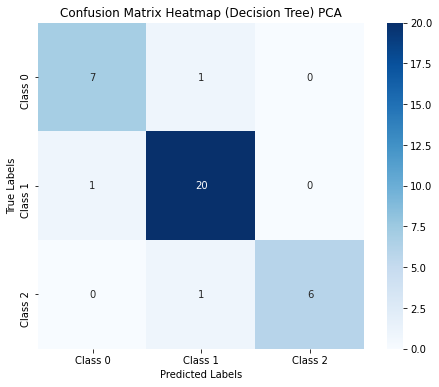

In [42]:
# Call the function with training and testing data
conf_matrix_dtPCA, precision_dtPCA, recall_dtPCA, f1score_dtPCA = decisionTree(Xp_train, Xp_test, y_train, y_test, 3, 2)

# Convert the confusion matrix to a DataFrame for easier plotting
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Adjust these labels based on your actual class labels
conf_matrix_df = pd.DataFrame(conf_matrix_dtPCA, index=class_labels, columns=class_labels)

# Print precision, recall, confusion matrix and F1 score for the best model
print("Precision: \n", precision_dtPCA)
print("Recall: ", recall_dtPCA)
print("Confusion Matrix: \n", conf_matrix_dtPCA)
print("F1 Score: ", f1score_dtPCA)

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g', cbar=True, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Decision Tree) PCA')
plt.show()

<h2> 5.3 Naive Bayes </h2>

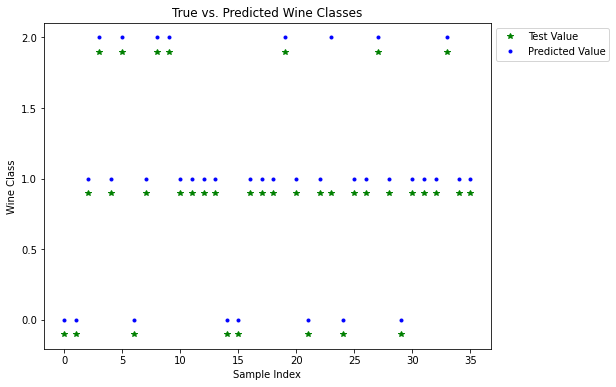

[[ 8  0  0]
 [ 0 20  1]
 [ 0  0  7]]
Accuracy: 0.97
Precision: 0.958333, Recall: 0.984127, F1-score: 0.969648


In [43]:
# Create naive bayes model with Gaussian observations
nb = naive_bayes.GaussianNB()

# Train using the training set
nb.fit(Xs_train, y_train)

# Predict using the test set
y_pred = nb.predict(Xs_test)

# Plot outputs
class_labels = ['Class 0', 'Class 1', 'Class 2']  
plt.figure(figsize=(8,6))   
plt.plot(y_test.values - 0.1, 'g*')
plt.plot(y_pred, 'b.')

#Label plot
plt.legend(['Test Value','Predicted Value'], loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Sample Index')
plt.ylabel('Wine Class')
plt.title('True vs. Predicted Wine Classes')
plt.show()

# Evaluation
conf_matrixNb = metrics.confusion_matrix(y_test.values, y_pred)
print(conf_matrixNb)
print("Accuracy: %.2f" % metrics.accuracy_score(y_test.values, y_pred))

# Calculate precision, recall, and f1-score
precisionNb, recallNb, fscoreNb, _ = metrics.precision_recall_fscore_support(y_test.values, y_pred, average='macro')


# Print precision, recall, and f1-score for all classes combined
print("Precision: {:.6f}, Recall: {:.6f}, F1-score: {:.6f}".format(precisionNb, recallNb, fscoreNb))

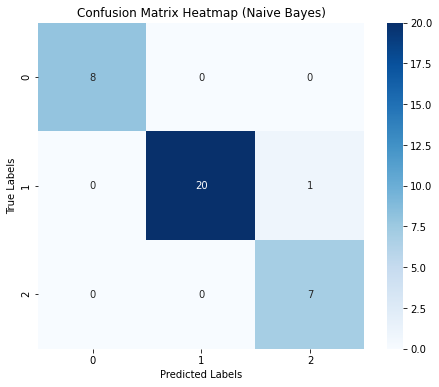

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixNb, annot=True, cmap='Blues', fmt='g', cbar=True, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Naive Bayes)')
plt.show()

<h2> 5.4 Naive Bayes PCA </h2>

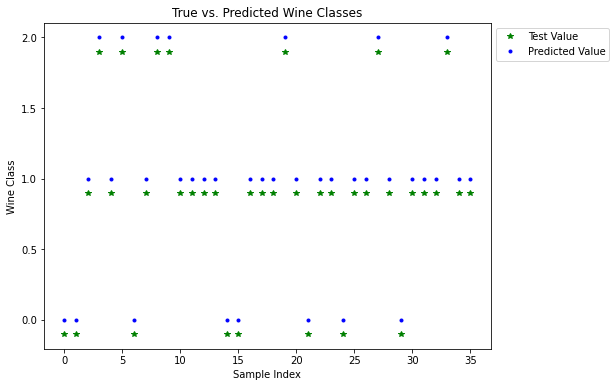

[[ 8  0  0]
 [ 0 21  0]
 [ 0  0  7]]
Accuracy: 1.00
Precision: 1.000000, Recall: 1.000000, F1-score: 1.000000


In [45]:
# Create naive bayes model with Gaussian observations
nb = naive_bayes.GaussianNB()

# Train using the training set
nb.fit(Xp_train, y_train)

# Predict using the test set
y_pred = nb.predict(Xp_test)

# Plot outputs
class_labels = ['Class 0', 'Class 1', 'Class 2']
plt.figure(figsize=(8,6))   
plt.plot(y_test.values - 0.1, 'g*')
plt.plot(y_pred, 'b.')

#Label plot
plt.legend(['Test Value','Predicted Value'], loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Sample Index')
plt.ylabel('Wine Class')
plt.title('True vs. Predicted Wine Classes')
plt.show()

# Evaluation
conf_matrixNbPCA = metrics.confusion_matrix(y_test.values, y_pred)
print(conf_matrixNbPCA)
print("Accuracy: %.2f" % metrics.accuracy_score(y_test.values, y_pred))

# Calculate precision, recall, and f1-score
precisionNbPCA, recallNbPCA, fscoreNbPCA, _ = metrics.precision_recall_fscore_support(y_test.values, y_pred, average='macro')


# Print precision, recall, and f1-score for all classes combined
print("Precision: {:.6f}, Recall: {:.6f}, F1-score: {:.6f}".format(precisionNbPCA, recallNbPCA, fscoreNbPCA))

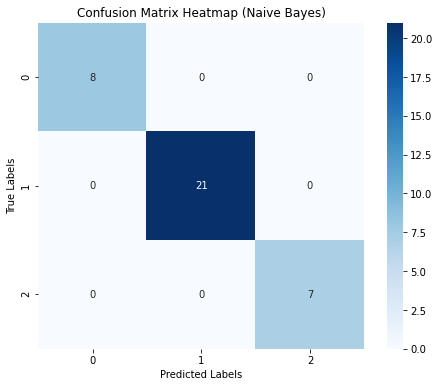

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixNbPCA, annot=True, cmap='Blues', fmt='g', cbar=True, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Naive Bayes)')
plt.show()

# 6. Evaluation

In [47]:
from tabulate import tabulate

# Results for kNN
knn_hyperparameter = k_dist
knn_precision_score = precisionkNN
knn_recall_score = recallkNN
knn_confusion_matrix = conf_matrixkNN
knn_f1_score = f1kNN

# Results for kNN PCA
knn_precision_scorePCA = precisionkNNPCA
knn_recall_scorePCA = recallkNNPCA
knn_confusion_matrixPCA = conf_matrixkNNPCA
knn_f1_scorePCA = f1kNNPCA

# Results for Decision Tree
dt_hyperparameter = f"max_depth: {best_params['max_depth']}\nmin_samples_split: {best_params['min_samples_split']}"
dt_precision_score = precision_dt
dt_recall_score = recall_dt
dt_confusion_matrix = conf_matrix_dt
dt_f1_score = f1score_dt

# Results for Decision Tree PCA
dt_precision_scorePCA = precision_dtPCA
dt_recall_scorePCA = recall_dtPCA
dt_confusion_matrixPCA = conf_matrix_dtPCA
dt_f1_scorePCA = f1score_dtPCA

# Results for Naive Bayes
nb_precision_score = precisionNb
nb_recall_score = recallNb
nb_confusion_matrix = conf_matrixNb
nb_f1_score = fscoreNb

# Results for Naive Bayes PCA
nb_precision_scorePCA = precisionNbPCA
nb_recall_scorePCA = recallNbPCA
nb_confusion_matrixPCA = conf_matrixNbPCA
nb_f1_scorePCA = fscoreNbPCA

# Create a list of dictionaries for each model
models_results = [
    {"Algorithm": "kNN", "Best Hyperparameter": str(knn_hyperparameter), "Precision Score": f"{knn_precision_score:.4f}", "Recall Score": f"{knn_recall_score:.4f}", "Confusion Matrix": knn_confusion_matrix, "F1 Score": f"{knn_f1_score:.4f}"},
    {"Algorithm": "kNN PCA", "Best Hyperparameter": str(knn_hyperparameter), "Precision Score": f"{knn_precision_scorePCA:.4f}", "Recall Score": f"{knn_recall_scorePCA:.4f}", "Confusion Matrix": knn_confusion_matrixPCA, "F1 Score": f"{knn_f1_scorePCA:.4f}"},
    
    {"Algorithm": "Decision Tree", "Best Hyperparameter": str(dt_hyperparameter), "Precision Score": f"{dt_precision_score:.4f}", "Recall Score": f"{dt_recall_score:.4f}", "Confusion Matrix": dt_confusion_matrix, "F1 Score": f"{dt_f1_score:.4f}"},
    {"Algorithm": "Decision Tree PCA", "Best Hyperparameter": str(dt_hyperparameter), "Precision Score": f"{dt_precision_scorePCA:.4f}", "Recall Score": f"{dt_recall_scorePCA:.4f}", "Confusion Matrix": dt_confusion_matrixPCA, "F1 Score": f"{dt_f1_scorePCA:.4f}"},
    
    {"Algorithm": "Naive Bayes", "Best Hyperparameter": "-", "Precision Score": f"{nb_precision_score:.4f}", "Recall Score": f"{nb_recall_score:.4f}", "Confusion Matrix": nb_confusion_matrix, "F1 Score": f"{nb_f1_score:.4f}"},
    {"Algorithm": "Naive Bayes PCA", "Best Hyperparameter": "-", "Precision Score": f"{nb_precision_scorePCA:.4f}", "Recall Score": f"{nb_recall_scorePCA:.4f}", "Confusion Matrix": nb_confusion_matrixPCA, "F1 Score": f"{nb_f1_scorePCA:.4f}"},
]

# Convert the list of dictionaries to a visually appealing table
table = tabulate(models_results, headers="keys", tablefmt="fancy_grid", colalign=("center", "center", "center", "center", "center", "center"))

# Print the table
print(table)


╒═══════════════════╤═══════════════════════╤═══════════════════╤════════════════╤════════════════════╤════════════╕
│     Algorithm     │  Best Hyperparameter  │  Precision Score  │  Recall Score  │  Confusion Matrix  │  F1 Score  │
╞═══════════════════╪═══════════════════════╪═══════════════════╪════════════════╪════════════════════╪════════════╡
│        kNN        │           8           │       0.963       │     0.9841     │    [[ 8  0  0]     │   0.9723   │
│                   │                       │                   │                │     [ 1 20  0]     │            │
│                   │                       │                   │                │     [ 0  0  7]]    │            │
├───────────────────┼───────────────────────┼───────────────────┼────────────────┼────────────────────┼────────────┤
│      kNN PCA      │           8           │      0.9333       │     0.9683     │    [[ 8  0  0]     │   0.9463   │
│                   │                       │                   

<ol>
    <li><u><b> Comparing between kNN and kNN PCA:</b></u><br\>
        Based on the above, kNN without PCA which took in 13 features and kNN with PCA which only took in 4 features to train and test the model. The difference between the F1 scores for kNN and kNN PCA is only 2.6%, which is, about 46 data points, relatively small. Furthermore, there is only one data point difference between the confusion matrix of kNN without PCA and kNN with PCA. Hence it can be considered statistically insignificant. <br\><br\>kNN with PCA have fewer features and data points, the model was still able to achieve similar performance. A smaller dataset with fewer features will lead to model leaning towards underfitting or more conservative. It's performance on another unseen test data will likely be similar to the exisiting test dataset and is more predictable. <br\><br\>In contrast, a higher number of features can lead to overfitting, where the model is too tailored to the raining data and may not generalize well to new data and could lead to model being less predictable.
    </li>
<br\>
    <li><u><b> Comparing between Decision Tree and Decision Tree PCA:</b></u><br\>
        Based on the above, F1 score of Decision Tree model with and without PCA, the Decision Tree without PCA performs better than the Decision Tree model with PCA. The model without PCA is 2.9% F1 score higher than model with PCA. This 2.9% difference is a significant difference as it takes up almost 10% of the total data points of the model with PCA. There is also one more correct prediction of data point in the confusion matrix for Decision Tree without PCA. <br\><br\> With PCA, there are fewer features and data points which could lead to model underfitting. Since the difference is statistically significant, it can lead to the model being inaccurate if Decision Tree with PCA is to be used.
    </li>
<br\>
    <li><u><b> Comparing between Naive Bayes and Naive Bayes PCA:</b></u><br\>
        The Naive Bayes PCA model stands out with perfect precision, recall, and F1 Score, as well as an additional data point in the confusion matrix. However, this perfect performance could indicate overfitting, especially considering the small size of the dataset.
    </li>
<br\>
    <li><u><b> Comparing between kNN, Decision Tree and Naive Bayes in general:</b></u><br\>
        Keeping in mind that the wine dataset is imbalanced, with 71 data points in Class 1 and 48 data points in Class 2, kNN and Decision Tree is a better model to cater to an imbalanced dataset. Both models are more scalable as both model has a hyper parameter to be found before training the data to get the most optimal prediction. Whilst, Naive Bayes algorithm is sensitive to imbalanced dataset as it is heavily reliant on the probabilities to make a prediction. When data points are not spread evenly across the classes in the dataset, the probabilities calculated by Naive Bayes may be skewed which will lead to inaccurate predictions. <i>[5]</i><br\><br\> On a different note, it is clearly shown that Naive Bayes with PCA is trained and tested for 100% prediction. Therefore, it can be proven that PCA is one of the prominent preprocessing solution to improve the classifier performance (e.g. imbalanced dataset). <i>[6]</i>
    </li>
</ol>

# 7. Conclusion

<p>In conclusion, <b>kNN without PCA is the most optimal classification machine learning model</b> among K-Nearest Neighbors (kNN), Decision Tree, and Naive Bayes for scikit-learn Wine dataset. Considering the provided metrics and potential concerns about overfitting, I would choose the kNN model without PCA as the best algorithm for the wine dataset. It achieves a good balance between precision, recall, and F1 Score. Additionally, kNN tends to be robust and effective in various scenarios.</p>

# 8. References

<p>[1]: Kumar Aditya. 2020. KNN Algorithm: When? Why? How? https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f <br\></p>
    
<p>[2]: Mark Banoula. 2023. Understanding Naive Bayes Classifier. https://www.simplilearn.com/tutorials/machine-learning-tutorial/naive-bayes-classifier#:~:text=Advantages%20of%20Naive%20Bayes%20Classifier,-The%20following%20are&text=It%20doesn't%20require%20as,to%20make%20real%2Dtime%20predictions<br\></p>
    
<p>[3]: Yugesh Verma. 2021. Why Data Scaling is important in Machine Learning & How to effectively do it. https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/<br\></p>
    
<p>[4]:Beavers, Amy S.; John W. Lounsbury, Jennifer K. Richards, Schuyler W. Huck, Gary J. Skolits, and
Shelley L. Esquivel. 2013. Practical considerations for using exploratory factor analysis in
educational research. Practical Assessment, Research and Evaluation .https://scholarworks.umass.edu/cgi/viewcontent.cgi?article=1303&context=pare<br\></p>
    
<p>[5]:Charan H U. 2022. Naive Bayes algorithm. https://charanhu.medium.com/naive-bayes-algorithm-2a9415e21034<br\></p>
    
<p>[6]: T. Maruthi Padmaja, Bapi S. Raju, Rudra N. Hota, P. Radha Krishna. 2014. Class imbalance and its effect on PCA preprocessing. https://dl.acm.org/doi/10.1504/IJKESDP.2014.064265#:~:text=Among%20all%2C%20resampling%20solutions%20which,to%20improve%20the%20classifier%20performance.</p>